# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [26]:
#print city list
cities

['liuli',
 'marquette',
 'rikitea',
 'saint george',
 'thompson',
 'taolanaro',
 'grand river south east',
 'qaanaaq',
 'klaksvik',
 'mar del plata',
 'sitka',
 'puerto ayora',
 'mys shmidta',
 'sentyabrskiy',
 'chuy',
 'busselton',
 'ushuaia',
 'bambous virieux',
 'cidreira',
 'garmsar',
 'mataura',
 'avarua',
 'hilo',
 'bluff',
 'gorontalo',
 'jamestown',
 'zambezi',
 'vaini',
 'bababe',
 'albany',
 'esperance',
 'maloshuyka',
 'constitucion',
 'sola',
 'atuona',
 'le port',
 'skjervoy',
 'victoria',
 'kapaa',
 'tiksi',
 'amderma',
 'duba-yurt',
 'talnakh',
 'tuggurt',
 'caravelas',
 'saskylakh',
 'nybro',
 'shangrao',
 'bonthe',
 'najran',
 'barrow',
 'chernyshevskiy',
 'tupi paulista',
 'attawapiskat',
 'tiarei',
 'mahebourg',
 'coruripe',
 'maniwaki',
 'samusu',
 'gangotri',
 'redlands',
 'zverinogolovskoye',
 'hobart',
 'tharad',
 'leningradskiy',
 'port alfred',
 'kaitangata',
 'cortez',
 'hermanus',
 'kodiak',
 'kaya',
 'nazilli',
 'belushya guba',
 'tabiauea',
 'man',
 'colleg

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#test for response from Weather API
#url='http://api.openweathermap.org/data/2.5/weather?'

#test_city='Houston'
#test_query= f'{url}q={test_city}&appid={api_key}'
#test_results=requests.get(test_query).json()
#print(json.dumps(test_results, indent= 4)) 

{
    "coord": {
        "lon": -95.37,
        "lat": 29.76
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 293.56,
        "pressure": 1016,
        "humidity": 88,
        "temp_min": 292.59,
        "temp_max": 294.82
    },
    "visibility": 16093,
    "wind": {
        "speed": 1.97,
        "deg": 141
    },
    "clouds": {
        "all": 90
    },
    "dt": 1572918546,
    "sys": {
        "type": 1,
        "id": 4850,
        "country": "US",
        "sunrise": 1572871030,
        "sunset": 1572910373
    },
    "timezone": -21600,
    "id": 4699066,
    "name": "Houston",
    "cod": 200
}


In [14]:
#test for loop
#url='http://api.openweathermap.org/data/2.5/weather?'

#for city in cities:
   # query_url= f'{url}q={city}&appid={api_key}'
   # city_response=requests.get(query_url).json()
    
#print(json.dumps(city_response, indent= 4)) 

{
    "coord": {
        "lon": 124.81,
        "lat": 43.5
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "model",
    "main": {
        "temp": 277.71,
        "pressure": 1024,
        "humidity": 32,
        "temp_min": 277.71,
        "temp_max": 277.71,
        "sea_level": 1024,
        "grnd_level": 989
    },
    "wind": {
        "speed": 3.3,
        "deg": 337
    },
    "clouds": {
        "all": 0
    },
    "dt": 1573191792,
    "sys": {
        "country": "CN",
        "sunrise": 1573165459,
        "sunset": 1573201478
    },
    "timezone": 28800,
    "id": 2037222,
    "name": "Gongzhuling",
    "cod": 200
}


In [7]:
#identify which cities from random pull have a response from Weather API 
url='http://api.openweathermap.org/data/2.5/weather?'
found_cities=[]

for city in cities:
    query_url= f'{url}q={city}&appid={api_key}'
    
    try:
    #lists for url and coord of each city
        city_response=requests.get(query_url)
        city_response.raise_for_status()
        city_json = city_response.json()
        found_cities.append(city)
    except requests.exceptions.HTTPError as httperror:
        pass 
#list of cities with results   
print(found_cities)
        

['liuli', 'marquette', 'rikitea', 'saint george', 'thompson', 'qaanaaq', 'klaksvik', 'mar del plata', 'sitka', 'puerto ayora', 'chuy', 'busselton', 'ushuaia', 'bambous virieux', 'cidreira', 'garmsar', 'mataura', 'avarua', 'hilo', 'bluff', 'gorontalo', 'jamestown', 'zambezi', 'vaini', 'albany', 'esperance', 'constitucion', 'sola', 'atuona', 'le port', 'skjervoy', 'victoria', 'kapaa', 'tiksi', 'duba-yurt', 'talnakh', 'caravelas', 'saskylakh', 'nybro', 'shangrao', 'bonthe', 'najran', 'barrow', 'chernyshevskiy', 'tupi paulista', 'tiarei', 'mahebourg', 'coruripe', 'maniwaki', 'redlands', 'zverinogolovskoye', 'hobart', 'tharad', 'leningradskiy', 'port alfred', 'kaitangata', 'cortez', 'hermanus', 'kodiak', 'kaya', 'nazilli', 'man', 'college', 'narsaq', 'borogontsy', 'punta arenas', 'baglan', 'tuktoyaktuk', 'cape town', 'port-gentil', 'khatanga', 'provideniya', 'arraial do cabo', 'ucluelet', 'namibe', 'yellowknife', 'chanute', 'panguma', 'sao joao da barra', 'butaritari', 'bethel', 'cherskiy',

In [4]:
# get the weather url, lat, lon coordinates of the location of your interest
url='http://api.openweathermap.org/data/2.5/weather?'#at={lat}&lon={lon}'

#create blank lists for weather url and lat,lon 
found_cities=[]
weather_url=[]
cities_lat=[]
cities_lon=[] 
coordinates = list(zip(cities_lat, cities_lon))

for city in cities:
    query_url= f'{url}q={city}&appid={api_key}'
   
    try:
    #lists for url and coord of each city
        city_response=requests.get(query_url)
        city_response.raise_for_status()
        city_json = city_response.json()
        weather_url.append(query_url)
        cities_lat.append(city_json['coord']['lat'])
        cities_lon.append(city_json['coord']['lon'])
     
    except requests.exceptions.HTTPError as httperror:
        print(f'Request for city {city} failed with HTTP Error {httperror}') 
    except KeyError as key_error:
        print(f'Request for city {city} failed with Key Error {key_error}')
    except Exception as e:
        print(f'Request for city {city} failed with error {type(e)} {e}')
        
#print list ressults    
print(weather_url)
print(cities_lat)
print(cities_lon)



Request for city taolanaro failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city grand river south east failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=grand%20river%20south%20east&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city mys shmidta failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=mys%20shmidta&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city sentyabrskiy failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city bababe failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=bababe&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city maloshuyka failed wi

Request for city barbar failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=barbar&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city dekoa failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=dekoa&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city sakakah failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=sakakah&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city andevoranto failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=andevoranto&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city ruatoria failed with HTTP Error 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=ruatoria&appid=1168dc1a9b75884a78c24d813ed76f1e
Request for city porto santo failed with HTTP Error 404 Client Error: Not Found for url: ht

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#collect and create lists for city, cloudiness, country, date, humidity, lat, lng, max temp, wind speed 
#pull city, country, lat, lng from existing lists
url='http://api.openweathermap.org/data/2.5/weather?'#at={lat}&lon={lon}'

#create blank lists for cloudiness, humidity, max temp, wind speed, country
cloudiness_list=[]
humidity_list=[] 
maxtemp_list=[]
windspeed_list=[] 
country=[]

#serach for cities from found_cities list where there are results returned from API call
for city in found_cities:
    query_url= f'{url}q={city}&appid={api_key}'
   
    try:
        #request for each city 
        city_data=requests.get(query_url)
        city_data.raise_for_status()
        city2_json = city_data.json()
        #append in results lists for dataframe
        cloudiness_list.append(city2_json['clouds']['all'])
        humidity_list.append(city2_json['main']['humidity'])
        maxtemp_list.append(city2_json['main']['temp_max'])
        windspeed_list.append(city2_json['wind']['speed'])
        country.append(city2_json['sys']['country'])
        
    except requests.exceptions.HTTPError as httperror:
        print(f'Request for city {city} failed with HTTP Error {httperror}')
    except KeyError as key_error:
        print(f'Request for city {city} failed with Key Error {key_error}')
    except Exception as e:
        print(f'Request for city {city} failed with error {type(e)} {e}')

#print the lists for dataframe
print(cloudiness_list)
print(humidity_list)
print(maxtemp_list)
print(windspeed_list)
print(country)

[4, 100, 99, 20, 90, 0, 100, 0, 0, 75, 1, 0, 75, 20, 1, 0, 62, 92, 1, 0, 10, 4, 100, 1, 20, 0, 75, 30, 4, 96, 0, 75, 1, 90, 40, 40, 0, 78, 90, 4, 28, 0, 100, 100, 97, 75, 20, 91, 9, 1, 100, 75, 3, 0, 97, 44, 1, 100, 75, 36, 0, 0, 1, 0, 17, 75, 36, 90, 99, 20, 100, 100, 100, 90, 45, 75, 90, 58, 98, 100, 90, 84, 100, 20, 75, 1, 92, 98, 100, 13, 85, 1, 84, 0, 20, 0, 0, 10, 75, 94, 100, 5, 75, 90, 0, 75, 87, 1, 0, 0, 3, 28, 11, 20, 75, 78, 90, 25, 50, 100, 17, 97, 75, 100, 0, 8, 90, 99, 98, 20, 1, 90, 75, 20, 73, 69, 40, 2, 49, 77, 100, 55, 40, 27, 40, 49, 94, 26, 81, 88, 30, 20, 1, 27, 88, 90, 90, 71, 59, 90, 100, 71, 40, 90, 99, 75, 0, 75, 40, 3, 20, 100, 75, 99, 0, 0, 35, 3, 100, 100, 0, 97, 90, 100, 34, 37, 0, 86, 100, 90, 40, 40, 96, 75, 0, 0, 100, 90, 86, 94, 90, 0, 96, 100, 58, 52, 90, 100, 87, 40, 96, 40, 66, 75, 93, 20, 25, 100, 0, 90, 100, 100, 76, 33, 20, 40, 75, 1, 75, 62, 100, 0, 5, 85, 100, 1, 0, 90, 63, 0, 0, 51, 40, 92, 100, 100, 15, 100, 1, 20, 0, 90, 26, 75, 29, 75, 53, 7

In [9]:
#check lengths of each list for results_df
len(found_cities)

508

In [10]:
#check lengths of each list for results_df
len(cities_lat)

508

In [11]:
#check lengths of each list for results_df
len(cities_lon)

508

In [12]:
#check lengths of each list for results_df
len(cloudiness_list)

508

In [13]:
#check lengths of each list for results_df
len(humidity_list)

508

In [14]:
#check lengths of each list for results_df
len(maxtemp_list)

508

In [15]:
#check lengths of each list for results_df
len(windspeed_list)

508

In [16]:
#check lengths of each list for results_df
len(country)

508

In [17]:
#reuslts into dataframe
results_df= pd.DataFrame({'Cities' : found_cities,
                        'Cloudiness' : cloudiness_list,
                        'Country' : country,
                        'Humidity' : humidity_list,
                        'Lat' : cities_lat,
                        'Lng' : cities_lon,
                        'Max Temp' : maxtemp_list,
                        'Wind Speed' : windspeed_list})
results_df

,Cities,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,liuli,4,TZ,71,-11.10,34.65,300.34,2.71
1,marquette,100,US,68,46.54,-87.40,269.82,1.50
2,rikitea,99,PF,78,-23.12,-134.97,296.29,5.30
3,saint george,20,GR,81,39.45,22.34,284.15,1.73
4,thompson,90,CA,66,55.74,-97.86,263.15,2.60
...,...,...,...,...,...,...,...,...
503,vestmanna,100,FO,86,62.16,-7.17,276.15,6.20
504,henties bay,0,NA,81,-22.12,14.28,291.48,0.45
505,eirunepe,100,BR,91,-6.66,-69.87,296.87,1.07
506,bongor,29,TD,39,10.28,15.37,300.02,1.56


In [27]:
#convert results_df to csv file
export_csv= results_df.to_csv(r'Weather Results Dataframe.csv',index = None, header=True) 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
#using results_df, scatter plot with lat on x axis and max temp on y axis 

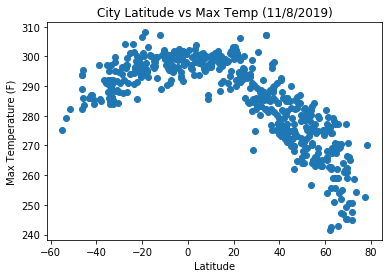

In [57]:
x_axis= results_df['Lat']
y_axis=results_df['Max Temp']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_title('City Latitude vs Max Temp (11/8/2019)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
#save the figure to png file
plt.savefig('City Latitude vs Max Temp.png')
#save the figure to png file
plt.savefig('City Latitude vs Max Temp.png')

#### Latitude vs. Humidity Plot

In [ ]:
#using results_df, scatter plot with lat on x axis and humidity on y axis 

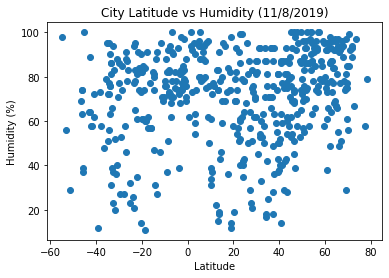

In [58]:
x_axis= results_df['Lat']
y_axis=results_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (11/8/2019)")
#save the figure to png file
plt.savefig("City Latitude vs Humidity.png")

#### Latitude vs. Cloudiness Plot

In [ ]:
#using results_df, scatter plot with lat on x axis and cloudiness on y axis 

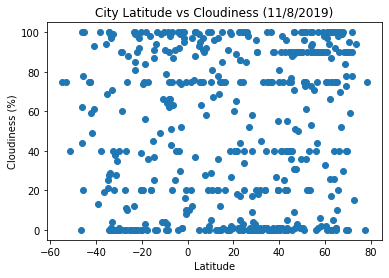

In [59]:
x_axis= results_df['Lat']
y_axis=results_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (11/8/2019)")
#save the figure to png file
plt.savefig("City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

In [ ]:
#using results_df, scatter plot with lat on x axis and Wind Speed on y axis 

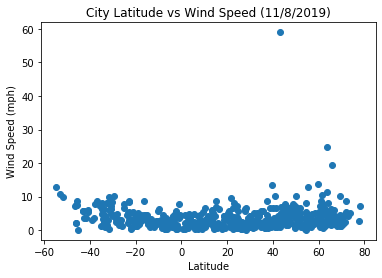

In [60]:
x_axis= results_df['Lat']
y_axis=results_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (11/8/2019)")
#save the figure to png file
plt.savefig("City Latitude vs Wind Speed.png")